In [1]:
#For this lab we will build a model on customer churn binary classification problem. You will be 
#using Data/DATA_Customer-Churn.csv file.

#Scenario
#You are working as an analyst for an internet service provider. 
#You are provided with this historical data about your company's customers and their churn trends. Your task is to build a
#machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

In [ ]:
"""Round 1

-Import the required libraries and modules that you would need.
-Read that data into Python and call the dataframe churnData.
-Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
-Check for null values in the dataframe. Replace the null values.
-Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
-Split the data into a training set and a test set.
-Scale the features either by using normalizer or a standard scaler.
-Fit a logistic Regression model on the training data.
-Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data"""

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df= pd.read_csv("DATA_Customer-Churn.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#dropping the columns we dont want

In [4]:
df.drop(['gender', 'Partner', 'Dependents',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract'], axis=1, inplace=True)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.5,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.5,No
7039,0,72,103.20,7362.9,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.6,Yes


In [ ]:
#converting to numeric

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.50,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.50,No
7039,0,72,103.20,7362.90,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.60,Yes


In [6]:
df.dtypes['TotalCharges'] 

dtype('float64')

In [11]:
# replacing values

In [7]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [8]:
df= df.dropna()

In [9]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


# DECISION TREE

In [13]:
#X-y SPLIT

In [11]:
X = df[['SeniorCitizen', 'tenure','MonthlyCharges','TotalCharges']]
y = df[['Churn']]

In [14]:
#Train-Test split

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 

#MAX DEPTH=2!!!!!!!
model = DecisionTreeClassifier(max_depth=2)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.787485,0.769194
1,Precision,0.707641,0.669291
2,Recall,0.328704,0.296684


### Extra: Create a function that takes a list of integers as a parameter, iterates over the range as depths, and prints the performance log of the decision tree for each depth 

In [26]:
def decision_trees (depth_list):
    
    for item in depth_list:
        model = DecisionTreeClassifier(max_depth=item)

        model.fit(X_train, y_train)

        y_pred_train_dt = model.predict(X_train)
        y_pred_test_dt = model.predict(X_test)


        performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                    'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                                    'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
        
        print (f"Showing depth: {item}")

        display(performance_df)
    
    

In [27]:
number_list= [1,2,3]

In [29]:
decision_trees (number_list)

Showing depth: 1


,Error_metric,Train,Test
0,Accuracy,0.736692,0.728436
1,Precision,0.000000,0.000000
2,Recall,0.000000,0.000000


Showing depth: 2


,Error_metric,Train,Test
0,Accuracy,0.787485,0.769194
1,Precision,0.707641,0.669291
2,Recall,0.328704,0.296684


Showing depth: 3


,Error_metric,Train,Test
0,Accuracy,0.787485,0.769194
1,Precision,0.707641,0.669291
2,Recall,0.328704,0.296684


## PRECISSION FOCUSES ON FP (False Positives)

## RECALL FOCUSES ON FN (False Negatives)

# CONFUSION MATRIX

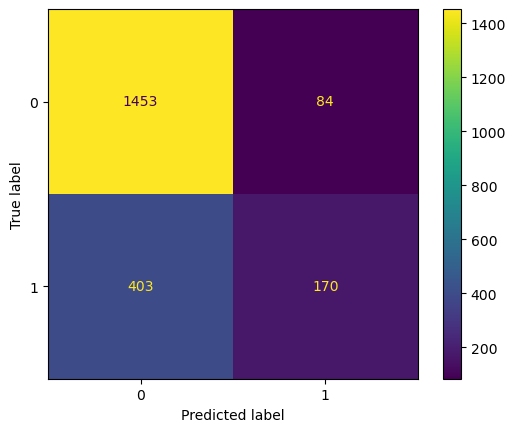

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

### DECISION TREE

<BarContainer object of 4 artists>

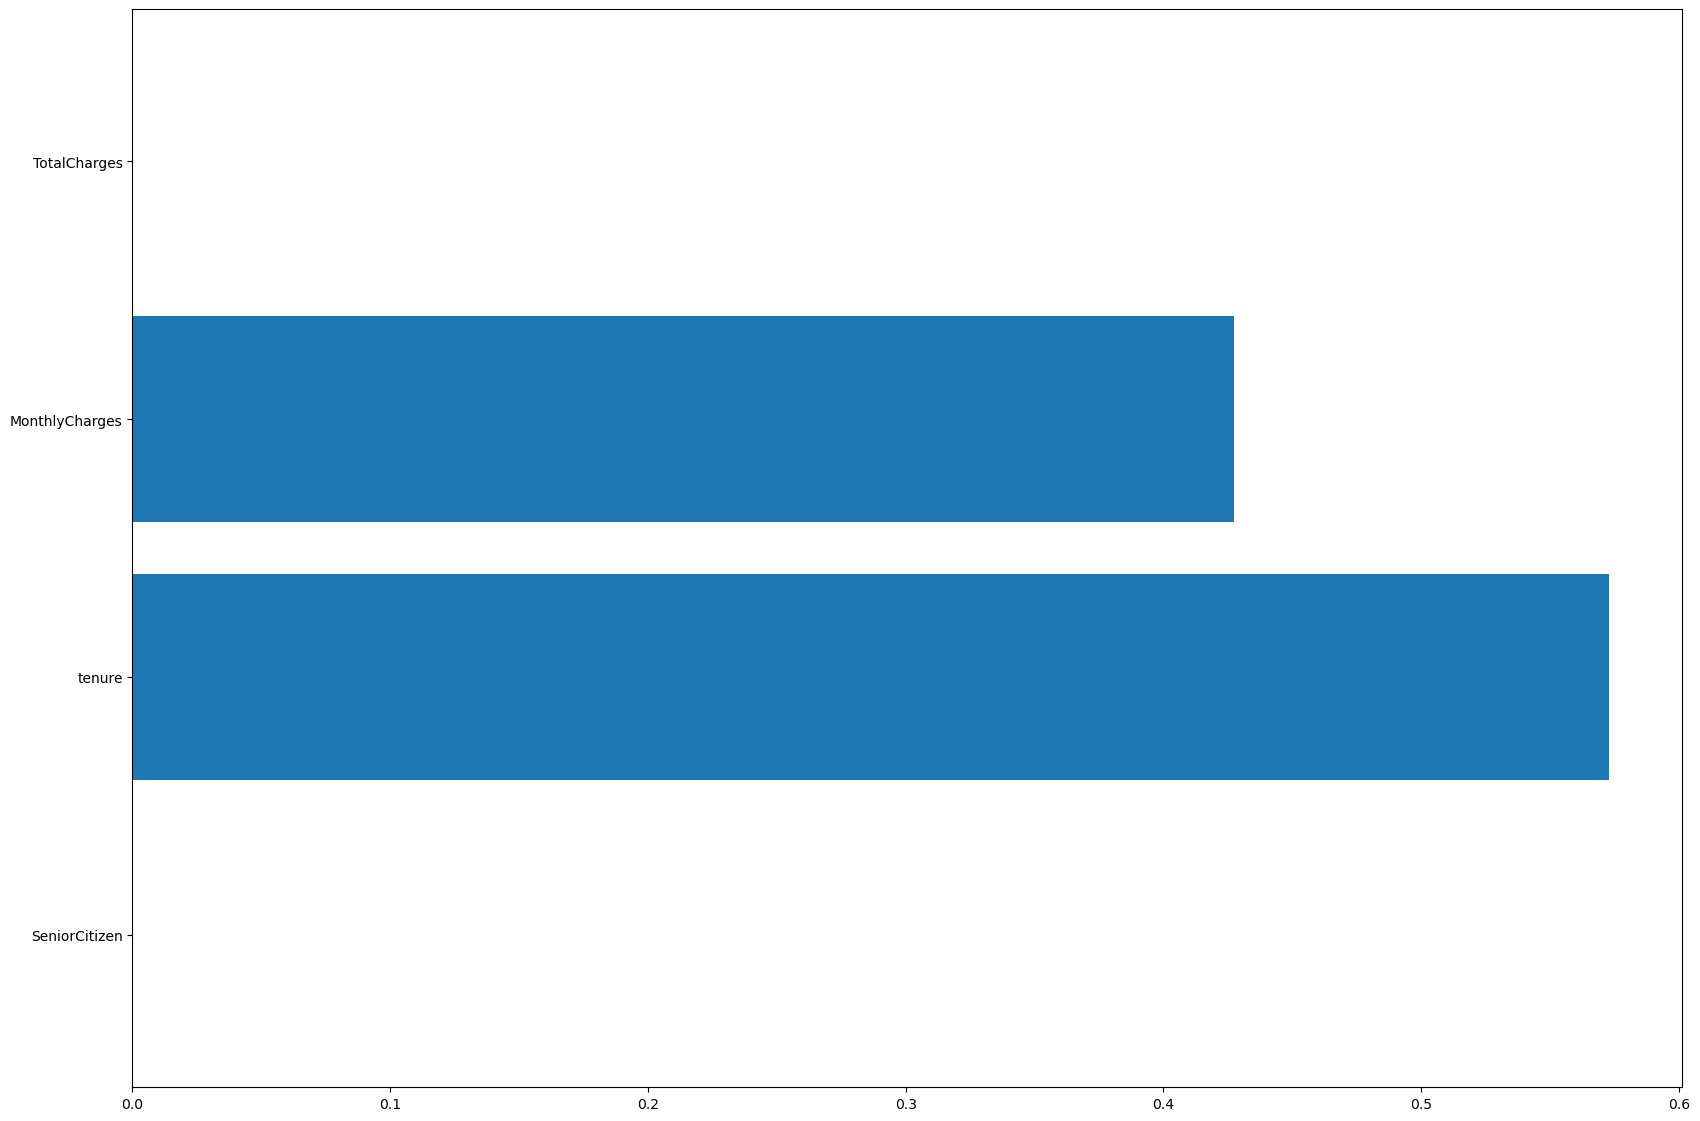

In [14]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

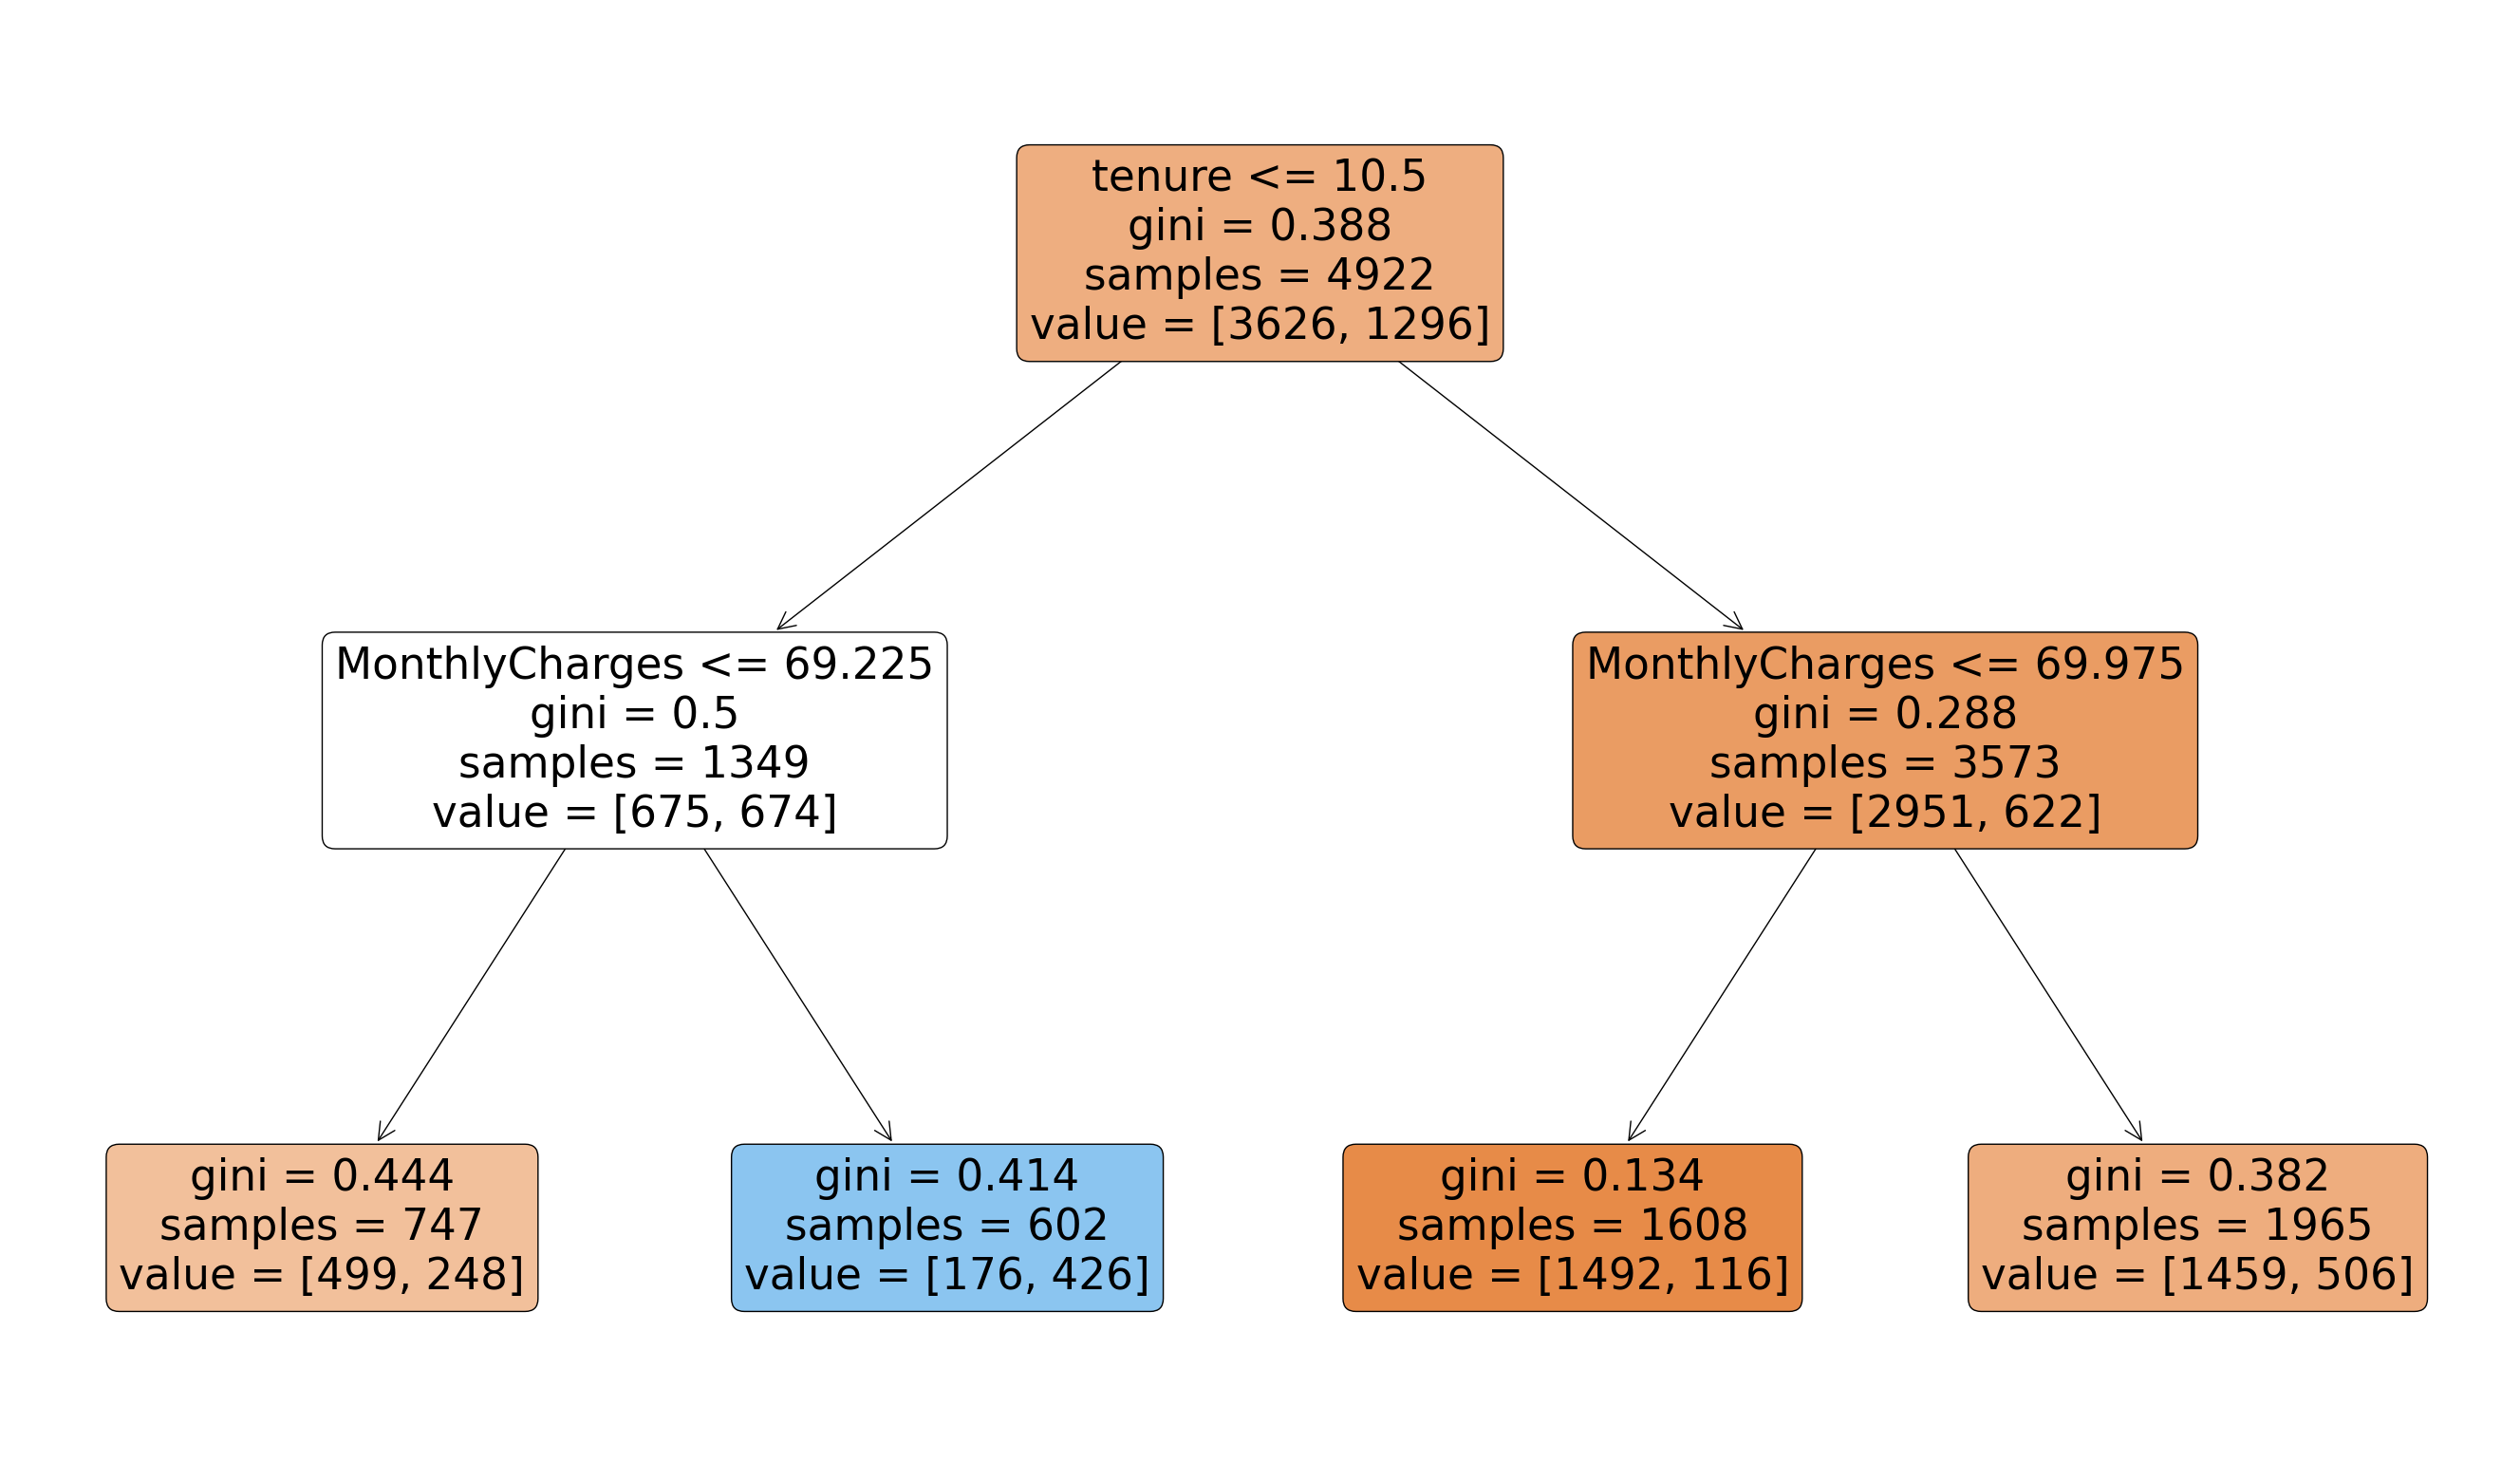

In [15]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show() 

## PREDICTING

In [19]:
sample= X_test.sample()
sample

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3227,0,12,56.3,628.65


In [20]:
model.predict(sample)

array([0], dtype=int64)

In [21]:
# Following the tree we see that the last leave it is [1492, 116], so 0 wins, hence, NO (as the model predicted).